In [1]:
#import required lib
import pandas as pd
import numpy as np
import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Gatharing csv and tsv files

In [2]:
url_1= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#extract file name
file_name = url_1.split('/')[-1]
# Get the response object of the requests library
response = requests.get(url_1)
# Write the file with the context manager with:
with open(file_name, mode ='wb') as file:
     file.write(response.content)
#Read the files
df_image_prediction= pd.read_csv(url_1, sep = '\t')
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

# Assessing image_predection.tsv file

In [3]:
#visual assessment 
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [4]:
#check the data through display a basic summary 
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [5]:
df_image_prediction['p1_conf'].unique()

array([ 0.465074 ,  0.506826 ,  0.596461 , ...,  0.716012 ,  0.323581 ,
        0.0970486])

In [6]:
df_image_prediction['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

## problems

- non descriptive columns (p1, p1_conf, p1_dog, etc)
- Redundant Column for prediction
- duplicated jpg url
- tweet id int and has to be obj


## Assessing twitter_archive_enhansed.csv file

In [7]:
#Visual Assessment
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
#check the data through display a basic summary
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Problems:
- Missing values (NaN)
- timestamp	is object insted of integer
- retweeted_status_timestamp coulmn is object instead of integer
- none values in stage
- name coulmn has inappropriate values (a, an , the)
- denumerator has no. less than 10 , make it 10
- redundant columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id)
- tweet id is int and it has to be obj

In [9]:
df_twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [10]:
df_twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

# Gatharing Tweet_jason.txt file

In [58]:
# create the file and write on it
df_list = []
with open ('tweet_json.txt',mode='r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id': tweet_id, 
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
api_df= pd.DataFrame(df_list)
                    

# Asessing tweet_json.txt

In [59]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [62]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [13]:
#Visual Assessment
api_df 

""


# Clean the data

# 1- Clean image_prediction

In [14]:
df_clean_image_prediction=df_image_prediction.copy()

## Remove duplication in url

In [15]:
sum(df_clean_image_prediction.jpg_url.duplicated())

66

In [16]:
df_clean_image_prediction =df_clean_image_prediction.drop_duplicates(subset=['jpg_url'],keep='last')

In [17]:
sum(df_clean_image_prediction.jpg_url.duplicated())

0

## Renaming the columns and Creat one col for predection level

In [18]:
list(df_clean_image_prediction)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [19]:
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
        'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
df_clean_image_prediction.columns = cols

In [20]:
list(df_clean_image_prediction)

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction_1',
 'confidence_1',
 'breed_1',
 'prediction_2',
 'confidence_2',
 'breed_2',
 'prediction_3',
 'confidence_3',
 'breed_3']

In [21]:
#pd.wide_to_long(df_clean_image_prediction, stubnames=['prediction', 'confidence', 'breed'], 
 #   i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

In [22]:
list(df_clean_image_prediction)

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction_1',
 'confidence_1',
 'breed_1',
 'prediction_2',
 'confidence_2',
 'breed_2',
 'prediction_3',
 'confidence_3',
 'breed_3']

In [67]:
df_clean_image_prediction['tweet_id']= df_clean_image_prediction['tweet_id'].astype(object)
df_clean_image_prediction['tweet_id'].dtypes

dtype('O')

# 2- Clean archive file

## Replace None with space

In [24]:
archive_clean= df_twitter_archive.copy()

In [25]:
#replace None values with empty spaces in dog stages columns
archive_clean.iloc[:, -4:] = archive_clean.iloc[:, -4: ].replace('None','')
archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,


## Keep original ratings (no retweets)

In [26]:
#filter the Nan of retweeted_status_user_id
archive_clean= archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]
print(sum(archive_clean.retweeted_status_user_id.value_counts()))

0


In [27]:
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,


## delete non useful columns

In [28]:
print(list(archive_clean))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [29]:
#Delete the redundant not needed coulmn
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], 1)

In [30]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

## Combine the dogs stages in one column

In [31]:
archive_clean['dog_stage']=archive_clean['doggo']+archive_clean['floofer']+archive_clean['pupper']+archive_clean['puppo']

In [32]:
archive_clean.drop(['doggo','floofer','pupper', 'puppo' ], axis=1, inplace=True)

In [33]:
archive_clean.loc[archive_clean.dog_stage== 'doggopupper', 'dog_stage']= 'doggo_pupper'
archive_clean.loc[archive_clean.dog_stage== 'doggofloofer', 'dog_stage']= 'doggo_floofer'
archive_clean.loc[archive_clean.dog_stage== 'doggopuppo', 'dog_stage']= 'doggo_puppo'

In [34]:
archive_clean.dog_stage = archive_clean.dog_stage.replace ('',np.nan)

In [35]:
archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN


## Clean Names

In [37]:
name_check=re.compile(r'(?:name(:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_clean.iterrows():
    try:
        archive_clean.loc[index,'name']=archive_clean.loc[index,'name'].replace('a','None')
        archive_clean.loc[index,'name']=archive_clean.loc[index,'name'].replace('an','None')
    except IndexError:
        archive_clean.loc[index,'name']= np.nan
        archive_clean.loc[index,'name']= np.nan
    except IndexError:
        archive_clean.loc[index,'name']= np.nan

archive_clean.name.value_counts(dropna=True)

None             735
ChNonerlie        11
Lucy              11
Cooper            10
Oliver            10
Tucker             9
Penny              9
the                8
Winston            8
SNonedie           8
LolNone            8
DNoneisy           7
Toby               7
BNoneiley          6
Nonen              6
Bo                 6
JNonex             6
KodNone            6
StNonenley         6
OscNoner           6
BellNone           6
Leo                5
Louis              5
Milo               5
Chester            5
Scout              5
Buddy              5
Rusty              5
Bentley            5
DNoneve            5
                ... 
Cupid              1
Berkeley           1
Philippe           1
Oddie              1
Rodney             1
TrNonevis          1
Mitch              1
BNonenditt         1
Crumpet            1
Sephie             1
Ed                 1
Creg               1
BNonerclNoney      1
Poppy              1
Amy                1
Beemo              1
Flurpson     

## convert timestamp col from string to datetime

In [38]:
archive_clean['timestamp']= pd.to_datetime(archive_clean['timestamp'])

In [39]:
#creat day, month,year columns and delete timestamp
archive_clean['day']=archive_clean['timestamp'].dt.day
archive_clean['month']=archive_clean['timestamp'].dt.month
archive_clean['year']=archive_clean['timestamp'].dt.year

In [40]:
archive_clean=archive_clean.drop('timestamp',1)

In [41]:
list(archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'day',
 'month',
 'year']

## correct rating numerator and denumerator dtype

In [42]:
archive_clean[['rating_numerator', "rating_denominator"]]=archive_clean[['rating_numerator', "rating_denominator"]].astype(float)

In [43]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             344 non-null object
day                   2175 non-null int64
month                 2175 non-null int64
year                  2175 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 249.9+ KB


In [44]:
archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,day,month,year
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,PhineNones,NaN,1,8,2017
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,1,8,2017
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,31,7,2017
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,DNonerlNone,NaN,30,7,2017
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,FrNonenklin,NaN,29,7,2017


In [45]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,5.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [46]:
#archive_clean['rating_numerator'] = archive_clean.text.str.extract("(\d)").astype(float)

In [47]:
archive_clean.rating_numerator.value_counts()

12.0      500
10.0      442
11.0      426
13.0      307
9.0       156
8.0        98
7.0        54
14.0       43
5.0        36
6.0        32
3.0        19
4.0        17
2.0         9
1.0         8
0.0         2
420.0       2
84.0        1
24.0        1
27.0        1
15.0        1
17.0        1
960.0       1
143.0       1
99.0        1
666.0       1
121.0       1
182.0       1
165.0       1
45.0        1
75.0        1
204.0       1
1776.0      1
80.0        1
88.0        1
144.0       1
26.0        1
20.0        1
44.0        1
60.0        1
50.0        1
Name: rating_numerator, dtype: int64

In [48]:
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

In [49]:
archive_clean['rating'] = 10*archive_clean['rating_numerator']/archive_clean['rating_denominator'].astype(float)

In [50]:
archive_clean.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,day,month,year,rating
199,854120357044912130,Sometimes you guys remind me just how impactfu...,14.0,10.0,None,pupper,17,4,2017,14.0
715,783839966405230592,This is Riley. His owner put a donut pillow ar...,13.0,10.0,Riley,NaN,6,10,2016,13.0
1074,739844404073074688,This is Simba. He's the grand prize. The troph...,12.0,10.0,SimbNone,NaN,6,6,2016,12.0
1670,682406705142087680,This is Patrick. He's a bigass pupper. 7/10 ht...,7.0,10.0,PNonetrick,pupper,31,12,2015,7.0
1244,711743778164514816,Meet Roosevelt. He's calculating the best case...,11.0,10.0,Roosevelt,NaN,21,3,2016,11.0
1137,728046963732717569,This is Raymond. He controls fountains with hi...,11.0,10.0,RNoneymond,NaN,5,5,2016,11.0
1168,721001180231503872,This is Oliver. Bath time is upon him. His fea...,11.0,10.0,Oliver,pupper,15,4,2016,11.0
681,788765914992902144,This is Butter. She can have whatever she want...,12.0,10.0,Butter,NaN,19,10,2016,12.0
503,813066809284972545,This is Tyr. He is disgusted by holiday traffi...,12.0,10.0,Tyr,NaN,25,12,2016,12.0
208,852311364735569921,This is Wiggles. She would like you to spot he...,13.0,10.0,Wiggles,NaN,13,4,2017,13.0


In [65]:
# change tweet id to string
archive_clean['tweet_id']= archive_clean['tweet_id'].astype(object)
archive_clean['tweet_id'].dtypes

dtype('O')

# 3- Clean tweet_json

In [60]:
api_clean= api_df.copy()

In [61]:
api_clean.head()

,favorite_count,retweet_count,tweet_id,user_count
0,39467,8853,892420643555336193,3200889
1,33819,6514,892177421306343426,3200889
2,25461,4328,891815181378084864,3200889
3,42908,8964,891689557279858688,3200889
4,41048,9774,891327558926688256,3200889


In [62]:
# change tweet id to string
api_clean['tweet_id']= api_clean['tweet_id'].astype(object)

In [66]:
api_clean['tweet_id'].dtypes

dtype('O')

# Convert all tables to be one dataset

In [68]:
df_tweeter = pd.merge(archive_clean, df_clean_image_prediction, how='left', on =['tweet_id'])

In [69]:
df_tweeter=df_tweeter[df_tweeter['jpg_url'].notnull()]

In [70]:
df_tweeter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 2152
Data columns (total 21 columns):
tweet_id              1910 non-null object
text                  1910 non-null object
rating_numerator      1910 non-null float64
rating_denominator    1910 non-null float64
name                  1910 non-null object
dog_stage             295 non-null object
day                   1910 non-null int64
month                 1910 non-null int64
year                  1910 non-null int64
rating                1910 non-null float64
jpg_url               1910 non-null object
img_num               1910 non-null float64
prediction_1          1910 non-null object
confidence_1          1910 non-null float64
breed_1               1910 non-null object
prediction_2          1910 non-null object
confidence_2          1910 non-null float64
breed_2               1910 non-null object
prediction_3          1910 non-null object
confidence_3          1910 non-null float64
breed_3               1910 non

In [71]:
df_tweet = pd.merge(df_tweeter, api_clean, how='left', on=['tweet_id'])

In [72]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 1909
Data columns (total 24 columns):
tweet_id              1910 non-null object
text                  1910 non-null object
rating_numerator      1910 non-null float64
rating_denominator    1910 non-null float64
name                  1910 non-null object
dog_stage             295 non-null object
day                   1910 non-null int64
month                 1910 non-null int64
year                  1910 non-null int64
rating                1910 non-null float64
jpg_url               1910 non-null object
img_num               1910 non-null float64
prediction_1          1910 non-null object
confidence_1          1910 non-null float64
breed_1               1910 non-null object
prediction_2          1910 non-null object
confidence_2          1910 non-null float64
breed_2               1910 non-null object
prediction_3          1910 non-null object
confidence_3          1910 non-null float64
breed_3               1910 non

# Storing, Analyzing, and Visualizing Data

In [73]:
df_tweet.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8' )

In [74]:
df_tweet['prediction_1'].value_counts()

golden_retriever             124
Labrador_retriever            87
Pembroke                      87
Chihuahua                     75
pug                           52
Pomeranian                    38
chow                          38
toy_poodle                    37
Samoyed                       37
malamute                      28
French_bulldog                26
cocker_spaniel                24
Chesapeake_Bay_retriever      23
miniature_pinscher            21
German_shepherd               20
seat_belt                     20
Siberian_husky                19
Staffordshire_bullterrier     18
Shetland_sheepdog             18
Eskimo_dog                    18
Shih-Tzu                      17
Rottweiler                    17
teddy                         17
Maltese_dog                   17
kuvasz                        16
beagle                        16
Italian_greyhound             16
Cardigan                      15
Lakeland_terrier              15
web_site                      15
          

## Insight one

In [75]:
df_dog_type_p1 = df_tweet.groupby('prediction_1').filter(lambda x: len(x) >= 20)

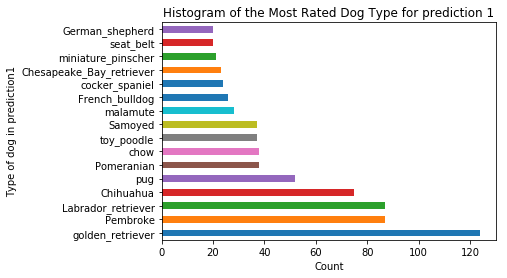

In [76]:
df_dog_type_p1['prediction_1'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type for prediction 1')
plt.xlabel('Count')
plt.ylabel('Type of dog in prediction1')
fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');


In [77]:
df_dog_type_p2 = df_tweet.groupby('prediction_2').filter(lambda x: len(x) >= 20)

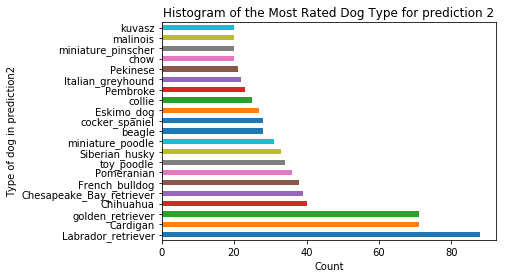

In [78]:
df_dog_type_p2['prediction_2'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type for prediction 2')
plt.xlabel('Count')
plt.ylabel('Type of dog in prediction2')
fig = plt.gcf() 
fig.savefig('output2.png',bbox_inches='tight');

In [79]:
df_dog_type_p3=df_tweet.groupby('prediction_3').filter(lambda x: len(x) >= 20)

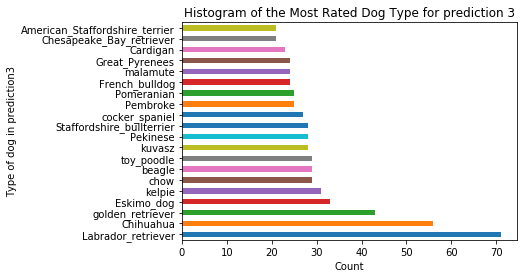

In [80]:
df_dog_type_p3['prediction_3'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type for prediction 3')
plt.xlabel('Count')
plt.ylabel('Type of dog in prediction3')
fig = plt.gcf() 
fig.savefig('output3.png',bbox_inches='tight');

## Insight Two

In [81]:
df_tweet['name'].value_counts()

None             571
ChNonerlie        11
Cooper            10
Lucy              10
Oliver            10
Penny              8
SNonedie           8
Tucker             8
Winston            8
DNoneisy           7
Toby               7
the                7
LolNone            6
KodNone            6
JNonex             6
StNonenley         6
BellNone           6
Leo                5
Buddy              5
Louis              5
Chester            5
OscNoner           5
Brody              4
Jerry              4
MNoneggie          4
BNoneiley          4
Winnie             4
Derek              4
Sophie             4
ClNonerk           4
                ... 
Kenzie             1
Stewie             1
DNonewn            1
Cupid              1
Berkeley           1
TrNonevis          1
BNonenditt         1
Rolf               1
Beemo              1
SpNonerk           1
spNonece           1
Crumpet            1
Sephie             1
Ed                 1
Creg               1
BNonerclNoney      1
Poppy        

In [82]:
df_dog_name=df_tweet.groupby('name').filter(lambda x: len(x) <= 11 and len(x) >= 7)

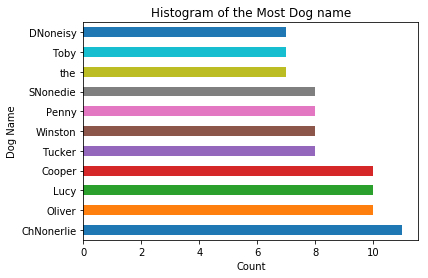

In [83]:
df_dog_name['name'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Dog name')
plt.xlabel('Count')
plt.ylabel('Dog Name')
fig = plt.gcf() 
fig.savefig('output4.png',bbox_inches='tight');

## insight three

In [91]:
df_tweet['dog_stage'].value_counts()

pupper           199
doggo             59
puppo             21
doggo_pupper       7
floofer            7
doggo_puppo        1
doggo_floofer      1
Name: dog_stage, dtype: int64

In [92]:
df_dog_stage=df_tweet.groupby('dog_stage').filter(lambda x: len(x) >= 7)

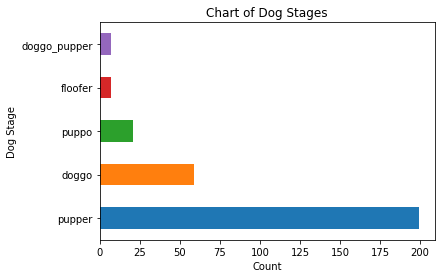

In [93]:
df_dog_stage['dog_stage'].value_counts().plot(kind = 'barh')
plt.title('Chart of Dog Stages')
plt.xlabel('Count')
plt.ylabel('Dog Stage')
fig = plt.gcf() 
fig.savefig('output6.png',bbox_inches='tight');
